In [17]:
from glossary_eval import get_sr2terms
from scipy.stats import ttest_ind
import matplotlib.pyplot as plt
import os
import csv
from collections import defaultdict, Counter
import tqdm
import numpy as np
import matplotlib as mpl
from scipy.stats import mannwhitneyu
mpl.rcParams['figure.dpi'] = 300

In [18]:
ROOT = '/data0/lucy/ingroup_lang/'
LOG_DIR = ROOT + 'logs/' 
SENSE_PMI_DIR = LOG_DIR + 'finetuned_sense_pmi/'
BASE_SENSE_PMI_DIR = LOG_DIR + 'base_sense_pmi/'
DN_SENSE_PMI_DIR = LOG_DIR + 'denoised_sense_pmi/'
TYPE_PMI_DIR = LOG_DIR + 'pmi/'
TFIDF_DIR = LOG_DIR + 'tfidf/'

## Finetuned Sense PMI

In [19]:
sr2terms = get_sr2terms()

In [20]:
gloss_vals = []
not_gloss_vals = []
for filename in tqdm.tqdm(sorted(os.listdir(SENSE_PMI_DIR))): 
    subreddit = filename.replace('.csv', '')
    if subreddit not in sr2terms: continue
    gloss_terms = set(sr2terms[subreddit])
    with open(SENSE_PMI_DIR + filename, 'r') as infile: 
        w2score = defaultdict(list)
        reader = csv.DictReader(infile)
        for row in reader: 
            w = row['sense'].split('#####')[0]
            score = float(row['pmi'])
            w2score[w].append(score)
        for w in w2score: 
            if w in gloss_terms: 
                gloss_vals.append(max(w2score[w]))
            else: 
                not_gloss_vals.append(max(w2score[w]))

100%|██████████| 474/474 [00:10<00:00, 44.50it/s] 


In [448]:
print(len(gloss_vals))
print(len(not_gloss_vals))

797
194995


In [449]:
print(ttest_ind(gloss_vals, not_gloss_vals))
print(mannwhitneyu(gloss_vals, not_gloss_vals, alternative='greater'))

Ttest_indResult(statistic=44.41177878021933, pvalue=0.0)
MannwhitneyuResult(statistic=123928645.0, pvalue=1.4772742702220816e-185)


Text(0.5, 0, 'max sense pmi')

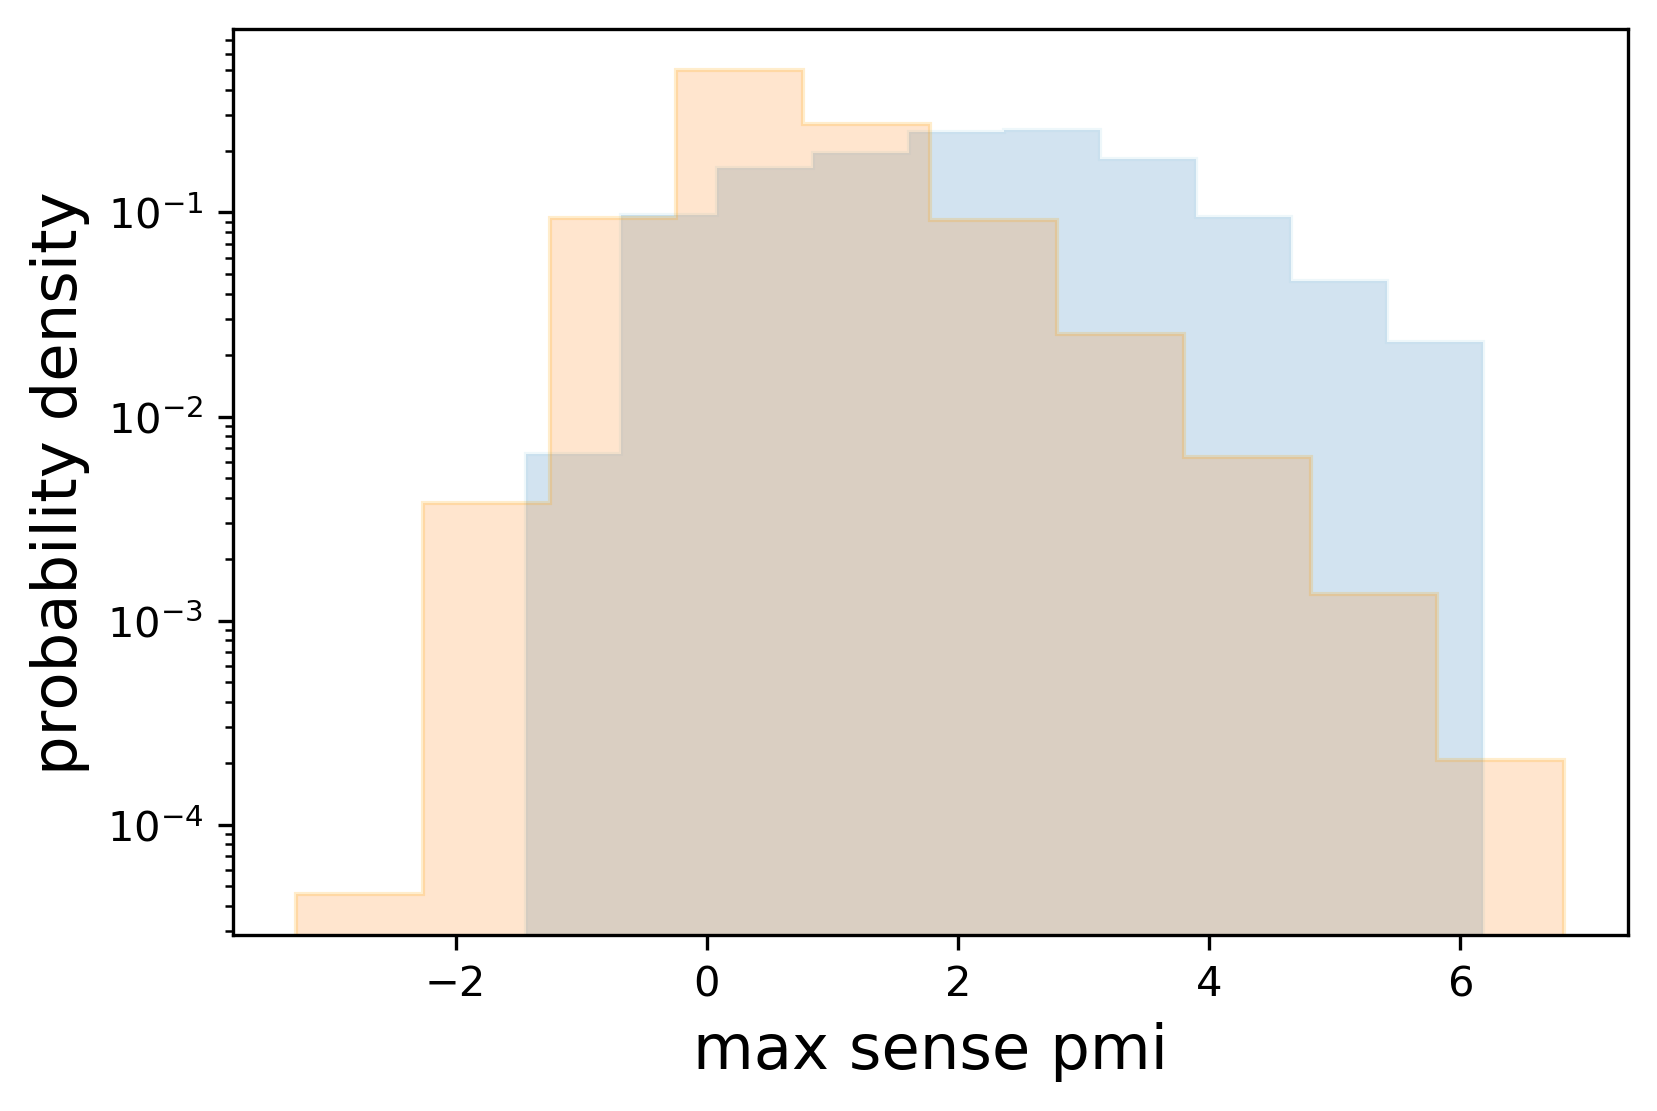

In [450]:
plt.hist(gloss_vals, label="glossary", alpha=0.2, density=True, edgecolor='lightblue', histtype= "stepfilled")
plt.hist(not_gloss_vals, label="non-glossary", alpha=0.2, density=True, edgecolor='orange', histtype= "stepfilled")
plt.yscale('log')
plt.ylabel('probability density', fontsize=15)
plt.xlabel('max sense pmi', fontsize=15)

In [486]:
print(np.median(gloss_vals))
print(np.median(not_gloss_vals))

2.1850084297418024
0.5522408616679229


In [21]:
gloss_vals = []
not_gloss_vals = []
for filename in tqdm.tqdm(sorted(os.listdir(SENSE_PMI_DIR))): 
    subreddit = filename.replace('.csv', '')
    if subreddit not in sr2terms: continue
    gloss_terms = set(sr2terms[subreddit])
    with open(SENSE_PMI_DIR + filename, 'r') as infile: 
        w2score = defaultdict(list)
        reader = csv.DictReader(infile)
        for row in reader: 
            w = row['sense'].split('#####')[0]
            score = float(row['pmi'])
            w2score[w].append(score)
        for w in w2score: 
            score = max(w2score[w])
            #if w in gloss_terms and score < 3.00:
            #    print(subreddit, w, score)
            if w not in gloss_terms and score > 4.00: 
                print(subreddit, w, score)

  2%|▏         | 11/474 [00:00<00:05, 88.50it/s]

afl sydney 5.296918436052656
afl saints 5.278951800599418
afl kicks 5.089328675679293
afl suns 5.033197750632435
afl dusty 5.008580984003414
afl eagles 4.917428814347752
afl quarter 4.722042147032207
afl forwards 4.606216244485777
afl lynch 4.565419391702063
afl tackle 4.546479643329777
afl bloke 4.477354046699611
afl kicking 4.457896484969313
afl darling 4.4029063287004355
afl possessions 4.401737000930589
afl quarters 4.397414764527356
afl eddie 4.258887162965283
afl au 4.238670371239907
afl coast 4.227975764327949
afl lions 4.216955593695735
afl supporter 4.115558901074105
afl tackling 4.097145022371805
afl dispose 4.04992824664303
afl marking 4.013139638458361
afl unsubscribe 4.001138082473598
airforce supervisor 5.019683723454465
airforce af 4.679392883028253
airforce force 4.535847812113605
airforce mil 4.495877388215754
airforce duty 4.462247864277003
airforce assignment 4.394546720629846
airforce manning 4.221477580236918
airforce civilian 4.1983481255431485
airforce chief 4.19

  6%|▌         | 28/474 [00:00<00:06, 71.89it/s]

 kay 5.692580557863616
antimlm schemes 5.317006737255061
antimlm scheme 5.231066973550712
antimlm pyramid 5.0723960226885865
antimlm oils 4.724883469935349
antimlm babe 4.633315238305854
antimlm vector 4.406584103244292
antimlm pitch 4.1624942339562265
aquariums parameters 6.235204528592238
aquariums shrimp 5.760200055452341
aquariums fin 5.5670220361993605
aquariums gallon 5.496977579689608
aquariums snail 5.496165139842259
aquariums gal 5.427809334517242
aquariums planted 5.363201005810083
aquariums goldfish 5.197851861952574
aquariums rot 5.179259582156278
aquariums sponge 5.024803941943949
aquariums pea 5.002850431728077
aquariums strips 4.98320343434428
aquariums tank 4.982062830059662
aquariums pond 4.805490997569581
aquariums stocking 4.761496767322942
aquariums filter 4.6960473178295175
aquariums neon 4.68988424458199
aquariums fish 4.637976403124315
aquariums bacteria 4.564424837770652
aquariums kit 4.5505418404098235
aquariums stocked 4.509316305072147
aquariums dwarf 4.49910

  8%|▊         | 39/474 [00:00<00:06, 64.37it/s]

4.204836924589516
asoiaf queen 4.184072538972744
asoiaf kings 4.156293822920888
asoiaf ruler 4.111394132011097
asoiaf jon 4.088854333056589
asoiaf heir 4.07872150813345
asoiaf stark 4.0493144466514615
asoiaf hound 4.039238565258187
asoiaf rightful 4.038849745696919
asoiaf king 4.000183360199124
atheism atheist 4.444846848436879
atheism temple 4.205313512770561
bigbrother feeds 6.467163352517766
bigbrother cliff 6.15104818893051
bigbrother holly 5.963486508165443
bigbrother jackson 5.861967028900204
bigbrother tommy 5.10542701277657
bigbrother brother 5.065495318283313
bigbrother anthony 4.819708603084424
bigbrother victor 4.797665038650554
bigbrother premiere 4.771269110890552
bigbrother tyler 4.717163637321883
bigbrother sis 4.716145673905485
bigbrother outsiders 4.635681514662881
bigbrother nick 4.464614361168922
bigbrother jack 4.462935351390022
bigbrother jury 4.446634516605942
bigbrother jacks 4.386995208788245
bigbrother diary 4.383264139614031
bigbrother dan 4.360243023316812
bi

 13%|█▎        | 62/474 [00:00<00:05, 78.04it/s]

4.224994391374786
bigbrother survivor 4.137461856496512
bigbrother pawn 4.135497050222879
bigbrother paranoia 4.072553723786614
bigbrother dynamics 4.0527183627304675
bigbrother raven 4.033061710180916
bigbrother josh 4.014978034747621
bodybuilding babe 5.262811165988603
bodybuilding heath 5.145542665975165
bodybuilding posing 4.931252944169819
bodybuilding lifts 4.857543082804729
bodybuilding rows 4.781729083749631
bodybuilding arnold 4.7237929641025
bodybuilding curl 4.673969177694309
bodybuilding raises 4.662412523242123
bodybuilding extensions 4.638006027084631
bodybuilding squat 4.538827991187527
bodybuilding presses 4.458893601231625
bodybuilding steroids 4.309683707345459
bodybuilding reps 4.2217819606002776
bodybuilding rack 4.2179030562923545
bodybuilding lifting 4.210388259789869
bodybuilding bulk 4.097892970191033
bodybuilding surplus 4.088285562988969
bodybuilding abs 4.08603169460323
bodybuilding elbows 4.068725037134476
boxoffice avatar 5.568705850082374
boxoffice titanic

 18%|█▊        | 87/474 [00:01<00:04, 80.22it/s]

cars si 5.191368309272646
cars enthusiasts 5.11904764769302
cars civic 5.021825152626762
cars accord 4.953844870103017
cars toyota 4.777594471116408
cars turbo 4.7492031654332925
cars enthusiast 4.67312706747591
cars manual 4.480399046131026
cars rev 4.476608546171282
cars steering 4.349890926477161
cars driven 4.329965842703901
cars injection 4.324267821589263
cars honda 4.312563225639735
cars clutch 4.280339545449938
cars tires 4.259348275489947
cars interior 4.240925990688763
cars ford 4.2309084935411265
cars diesel 4.2197300126829
cars miles 4.173898071770975
cars mans 4.171328528948302
cars reliability 4.144625415692695
cars cooper 4.142185757072827
cars exhaust 4.047262662246995
cars brakes 4.018164691306394
cars challenger 4.017425251398406
cats kitty 5.59983843169671
cats kittens 5.293004927299254
cats kitten 5.2414198535797905
cats adopting 5.1314115496683925
cats sweetie 5.110679266838468
cats vet 5.075945873318999
cats meow 5.03428557940389
cats cats 4.865840020117457
cats c

 20%|██        | 96/474 [00:01<00:07, 50.49it/s]

childfree tubes 4.297275155896178
christianity nt 4.95216324996114
christianity matthew 4.895156489327891
christianity genesis 4.716494162346337
christianity spirit 4.708929078744329
christianity creed 4.6255897923453615
christianity sins 4.592681561218634
christianity sin 4.579069776710469
christianity gospel 4.5691687057277575
christianity thy 4.552554428982606
christianity unto 4.505746426017165
christianity fathers 4.493729303286085
christianity supper 4.430281040024596
christianity testament 4.374612157992364
christianity grace 4.350909992691406
christianity verse 4.294613787369091
christianity teaches 4.28272364035735
christianity brethren 4.253140841972639
christianity revelation 4.22149026464131
christianity passage 4.127331495442027
christianity miracles 4.112513886344635
christianity jesus 4.083754565529611
christianity saints 4.076575980040279
christianity christians 4.062999344374085
christianity eve 4.016011305986622
churning ink 6.030492234776234
churning aspire 5.7635794

 23%|██▎       | 108/474 [00:01<00:06, 57.10it/s]

competitiveoverwatch ow 4.901424303765714
competitiveoverwatch crusty 4.712997189409275
competitiveoverwatch dallas 4.706634495621446
competitiveoverwatch zen 4.676242568751188
competitiveoverwatch sleepy 4.667876754128805
competitiveoverwatch bumper 4.650505153418044
competitiveoverwatch paris 4.6017715542990505
competitiveoverwatch shatter 4.5403953353033035
competitiveoverwatch pine 4.521826017338338
competitiveoverwatch rankings 4.4397038544095935
competitiveoverwatch ladder 4.409236285755827
competitiveoverwatch houston 4.38847168658461
competitiveoverwatch stitch 4.323623294563649
competitiveoverwatch gesture 4.312933850006531
competitiveoverwatch decay 4.278179869288583
competitiveoverwatch reign 4.199318496660878
competitiveoverwatch overwatch 4.193088703751806
competitiveoverwatch titans 4.145586564580666
competitiveoverwatch ark 4.144846499024015
competitiveoverwatch mercy 4.141920953066361
competitiveoverwatch shock 4.1382325392352675
competitiveoverwatch london 4.1252105245

 28%|██▊       | 134/474 [00:01<00:05, 63.03it/s]

deadbydaylight radius 5.838994109873065
deadbydaylight killers 5.672454248272978
deadbydaylight survivors 5.657845465269817
deadbydaylight survivor 5.581883488963999
deadbydaylight killer 5.433160718226075
deadbydaylight hatch 5.388570488121916
deadbydaylight entity 5.192484064829714
deadbydaylight daylight 5.190619853410292
deadbydaylight ons 4.936879858662039
deadbydaylight hook 4.900717588088329
deadbydaylight escapes 4.846569062699956
deadbydaylight weasel 4.825140386541661
deadbydaylight adrenaline 4.818170267295636
deadbydaylight nurse 4.685360481815589
deadbydaylight exhaustion 4.679127267244673
deadbydaylight perk 4.6683374344532185
deadbydaylight hooks 4.664472452482138
deadbydaylight slug 4.626057824807357
deadbydaylight whispers 4.623444477900365
deadbydaylight stalk 4.614193718128214
deadbydaylight generator 4.609071716671239
deadbydaylight locker 4.577705614299756
deadbydaylight immersed 4.568954475671651
deadbydaylight shack 4.49702474451139
deadbydaylight perks 4.4862105

 32%|███▏      | 154/474 [00:02<00:04, 64.61it/s]

dota2 ti 6.034396406983192
dota2 nip 5.203395220980778
dota2 eg 4.861935321460833
dota2 bracket 4.826318302999164
dota2 ee 4.667783039010688
dota2 vi 4.568579474923144
dota2 valve 4.283332329170154
dota2 brackets 4.261382119017478
dota2 liquid 4.256777103745084
dota2 immortal 4.157581260551298
dota2 miracle 4.1509413619644215
dota2 creeps 4.10071596105331
dota2 chess 4.080262682471014
elderscrollsonline elf 4.540535867259293
elderscrollsonline guild 4.32775420908633
elderscrollsonline parse 4.30260744300947
elderscrollsonline jewelry 4.187487018283303
elderscrollsonline trials 4.087036995755454
elderscrollsonline wield 4.080916547319274
elderscrollsonline scrolls 4.075045480070683
elderscrollsonline clockwork 4.061189699759501
exmormon essays 5.300570356878492
exmormon ward 5.29311969205882
exmormon brethren 5.197545546709761
exmormon saints 5.13484420244229
exmormon smith 5.009909745211953
exmormon joseph 4.920632155816865
exmormon utah 4.618207358862786
exmormon temple 4.604481824706

 34%|███▍      | 162/474 [00:02<00:05, 57.88it/s]

fashionreps chart 5.938383957438588
fashionreps haul 5.808352623930818
fashionreps tee 5.739236249580323
fashionreps flaw 5.564878003833025
fashionreps warehouse 5.353962126458308
fashionreps rl 5.2969805964475025
fashionreps oversized 5.239208950784301
fashionreps hoodie 5.227153552224902
fashionreps batch 5.184070828377706
fashionreps liner 5.133755722350587
fashionreps sellers 5.033512564825818
fashionreps gl 5.005466234044122
fashionreps cop 4.985777801673186
fashionreps seller 4.909188102042072
fashionreps customs 4.882794542247289
fashionreps reps 4.863982215400111
fashionreps retail 4.854385568509218
fashionreps shipped 4.698168650192971
fashionreps gucci 4.59432737567968
fashionreps stitch 4.561626286765467
fashionreps replica 4.5401889745140025
fashionreps waist 4.531185261264231
fashionreps shoe 4.443762446293072
fashionreps buckle 4.406406659749303
fashionreps pairs 4.373306711322958
fashionreps sole 4.371757524336129
fashionreps du 4.334852967400678
fashionreps stains 4.301

 39%|███▉      | 185/474 [00:02<00:04, 62.86it/s]

fireemblemheroes refine 6.138243467226873
fireemblemheroes disrupt 5.977177680538944
fireemblemheroes spiral 5.880172116164519
fireemblemheroes ploy 5.847196771789522
fireemblemheroes hone 5.466737245811474
fireemblemheroes roy 5.355692257770155
fireemblemheroes feathers 5.150822448448306
fireemblemheroes desperation 5.1122471510727445
fireemblemheroes fodder 4.869279873858027
fireemblemheroes sturdy 4.776560126411719
fireemblemheroes por 4.6573284188272055
fireemblemheroes banner 4.6535658263178785
fireemblemheroes picnic 4.650026121856203
fireemblemheroes null 4.646839145578488
fireemblemheroes awakening 4.616111368734129
fireemblemheroes iceberg 4.579419766422692
fireemblemheroes merge 4.541930533056754
fireemblemheroes seal 4.486194822536396
fireemblemheroes blessings 4.428422184780664
fireemblemheroes flashing 4.427451356525342
fireemblemheroes grail 4.42731845291349
fireemblemheroes distant 4.423958429841112
fireemblemheroes foe 4.421362831628368
fireemblemheroes seasonal 4.39238

 42%|████▏     | 198/474 [00:03<00:06, 43.97it/s]

gameofthrones worm 4.416402421706926
gameofthrones queen 4.405326073454196
gameofthrones landing 4.361162265520125
gameofthrones bran 4.346937497514861
gameofthrones heir 4.34206005520176
gameofthrones raven 4.335927237300726
gameofthrones kings 4.321653444374653
gameofthrones hound 4.314656637981098
gameofthrones throne 4.290849054782834
gameofthrones king 4.285388922145032
gameofthrones eyed 4.263801576322812
gameofthrones jon 4.174776888583523
gameofthrones fleet 4.115411017886365
gameofthrones rightful 4.097245324819233
gameofthrones walker 4.030387292050485
gamingcirclejerk diversity 5.218236429508181
gamingcirclejerk gamer 4.191079610768223
gamingcirclejerk notch 4.037730173887457
gendercritical gaze 4.411480956318463
gendercritical queer 4.1895146989194565
gendercritical identified 4.145615696327291
gendercritical feminine 4.139137002134922
gendercritical inclusive 4.130471341589092
gendercritical privilege 4.111997106492235
godzilla destroyer 6.168934934103252
godzilla godzilla

 51%|█████     | 242/474 [00:03<00:03, 69.52it/s]

hearthstone priest 4.663767694217655
hearthstone rogue 4.626772553502671
hearthstone whisper 4.474897052025958
hearthstone frenzy 4.449457045942103
hearthstone rattle 4.4014957255830724
hearthstone ladder 4.384171775651298
hearthstone warrior 4.331086440266548
hearthstone shadows 4.224424244246483
hearthstone vanish 4.217535412978564
hearthstone hs 4.209775765939996
hearthstone apprentice 4.195529917752904
hearthstone anomaly 4.188547211792748
hearthstone heroic 4.145910124710015
hearthstone deck 4.141516007974418
hearthstone blizzard 4.120828573563201
hearthstone unleash 4.059824755730255
hearthstone packs 4.020689863921902
justnomil monkeys 4.39021366377301
justnomil rocking 4.287491503108149
justnomil ro 4.250319136851333
justnomil notified 4.215364121817756
justnomil hugs 4.110826312911393
kpop

 54%|█████▍    | 256/474 [00:03<00:03, 58.33it/s]

 hee 5.798390375842444
kpop chorus 5.077493282329596
kpop idle 5.004212098151868
kpop sm 4.95587637616249
kpop luv 4.7031999129095245
kpop g 4.690377312889628
kpop bop 4.664992085387362
kpop idol 4.546086806219059
kpop korea 4.4780643290640745
kpop tour 4.428989944246315
kpop instrumental 4.370584215646298
kpop singles 4.359407153422398
kpop performances 4.25279085149204
kpop chart 4.179822728561534
kpop sunrise 4.171354921919459
kpop korean 4.168313794638426
kpop sunny 4.155762827159623
kpop est 4.13787899272307
kpop stan 4.132942550900566
kpop wendy 4.085392919924354
kpop limitless 4.058569154265186
kpop songs 4.052344335605899
kpop listens 4.044180903947975
kpop entertainment 4.030388550807418
kpop concerts 4.029011121520479
kpop compose 4.015922265341835
leagueoflegends tl 5.282679185258096
leagueoflegends riot 5.076566180970742
leagueoflegends worlds 5.00055971100095
leagueoflegends sa 4.64180089029873
leagueoflegends champ 4.6073592785003905
leagueoflegends dl 4.487445982961316
l

 70%|███████   | 334/474 [00:03<00:01, 98.75it/s]

motorcycles rider 5.549990780549529
motorcycles filtering 5.472218451504234
motorcycles riders 5.289389666700418
motorcycles splitting 5.197856733931185
motorcycles ridden 5.09768827235466
motorcycles bikes 5.053748940412372
motorcycles injected 5.024355173677049
motorcycles bike 4.874334423262813
motorcycles motorcycle 4.790180162617657
motorcycles throttle 4.77878592353188
motorcycles tire 4.70556263178109
motorcycles lever 4.643542362893875
motorcycles clutch 4.635110956583525
motorcycles rode 4.618475248289944
motorcycles rash 4.51224831975501
motorcycles honda 4.429269206293318
motorcycles rev 4.377309467362607
motorcycles cooled 4.2931370319687385
motorcycles riding 4.253453391563921
motorcycles brake 4.250549729885257
motorcycles stroke 4.143227823298997
motorcycles injection 4.1242956367314765
motorcycles mirrors 4.092796969672105
motorcycles triumph 4.062944006522424
motorcycles ride 4.0597401857146425
motorcycles brakes 4.034838692908862
motorcycles exhaust 4.01521883502673
p

 82%|████████▏ | 390/474 [00:04<00:00, 120.58it/s]

purplepilldebate imperative 5.454726537781905
purplepilldebate bonding 4.465692400715826
purplepilldebate pill 4.390061778857947
purplepilldebate unattractive 4.010934707309535
purplepilldebate abundance 4.0085921763059975
rainbow6 operator 5.122001724117937
rainbow6 hostage 5.105753397649333
rainbow6 siege 4.939079386290593
rainbow6 clash 4.662444846729726
rainbow6 ranked 4.492182166464859
rainbow6 iq 4.355508100401359
rainbow6 ops 4.321511848495826
rainbow6 attacker 4.284689310618582
rainbow6 echo 4.177885279853076
raisedbynarcissists nm 4.96828650811945
raisedbynarcissists monkeys 4.235058029155176
raisedbynarcissists rocking 4.031001303249042
skincareaddiction gentle 5.626548068353003
skincareaddiction snail 5.602023157527243
skincareaddiction elephant 5.585229102775367
skincareaddiction ordinary 5.584300026531526
skincareaddiction prone 5.4752398158901405
skincareaddiction drying 5.4722783338199665
skincareaddiction essence 5.453354639579789
skincareaddiction lotion 5.399901364348

 94%|█████████▍| 446/474 [00:04<00:00, 143.35it/s]

thebachelor bachelor 6.236077790352958
thebachelor tyler 5.190381668566974
thebachelor paradise 5.010185795069348
thebachelor luke 4.96285374998625
thebachelor cam 4.8768572555336345
thebachelor abc 4.608759452641009
thebachelor peter 4.3697917403604345
thebachelor filming 4.337622046073606
thebachelor cocktail 4.330891500344778
thebachelor pete 4.2524305058009615
thebachelor dean 4.236464622527071
thebachelor producers 4.204828025978499
thebachelor wills 4.170804675815616
thebachelor mansion 4.062307040612474
thebachelor fame 4.037848086788786
thedivision nemesis 5.474960244148095
thedivision invaded 4.890407780194923
thedivision division 4.564296155611938
thedivision attributes 4.510936507416883
thedivision raid 4.5036167886228435
thedivision ropes 4.388121660969928
thedivision unbreakable 4.348529266976887
thedivision exotic 4.275099354336037
thedivision attribute 4.272768152143123
thedivision compensated 4.165209350262598
thedivision reds 4.128220780893258
thedivision normalized 4.

100%|██████████| 474/474 [00:04<00:00, 100.02it/s]

whowouldwin buster 5.406474003843722
whowouldwin blasts 5.125546843295645
whowouldwin prompt 4.790672689315778
whowouldwin superman 4.677681901143637
whowouldwin durable 4.4817546922939036
whowouldwin gorilla 4.434320698663418
whowouldwin manhattan 4.289924014488944
whowouldwin busting 4.2888663729308085
whowouldwin thor 4.147032179104858
whowouldwin witch 4.123878547009537
whowouldwin dimensional 4.098518772472583
whowouldwin hulk 4.0975735928180965
whowouldwin withstand 4.096768115529279
whowouldwin batman 4.095178979107017
whowouldwin weakened 4.00893093018796
wow har 5.405002536095626
wow horde 5.066915035999823
wow wrath 4.916029805735685
wow halls 4.8874336782582235
wow legion 4.870210459262651
wow alliance 4.524799153715501
wow dk 4.4772876441432485
wow warcraft 4.417495059359991
wow blizzard 4.223523139972783
wow classic 4.178750372016161
wow elf 4.16826377065456
wow expansion 4.071921126788554
wow crusade 4.017537899827546


## Denoised Sense PMI 

In [453]:
#sr2terms = get_sr2terms()

In [454]:
'''
gloss_vals = []
not_gloss_vals = []
for filename in tqdm.tqdm(sorted(os.listdir(DN_SENSE_PMI_DIR))): 
    subreddit = filename.replace('.csv', '')
    if subreddit not in sr2terms: continue
    gloss_terms = set(sr2terms[subreddit])
    with open(DN_SENSE_PMI_DIR + filename, 'r') as infile: 
        w2score = defaultdict(list)
        reader = csv.DictReader(infile)
        for row in reader: 
            w = row['sense'].split('#####')[0]
            score = float(row['pmi'])
            w2score[w].append(score)
        for w in w2score: 
            if w in gloss_terms: 
                gloss_vals.append(max(w2score[w]))
            else: 
                not_gloss_vals.append(max(w2score[w]))
'''

"\ngloss_vals = []\nnot_gloss_vals = []\nfor filename in tqdm.tqdm(sorted(os.listdir(DN_SENSE_PMI_DIR))): \n    subreddit = filename.replace('.csv', '')\n    if subreddit not in sr2terms: continue\n    gloss_terms = set(sr2terms[subreddit])\n    with open(DN_SENSE_PMI_DIR + filename, 'r') as infile: \n        w2score = defaultdict(list)\n        reader = csv.DictReader(infile)\n        for row in reader: \n            w = row['sense'].split('#####')[0]\n            score = float(row['pmi'])\n            w2score[w].append(score)\n        for w in w2score: \n            if w in gloss_terms: \n                gloss_vals.append(max(w2score[w]))\n            else: \n                not_gloss_vals.append(max(w2score[w]))\n"

In [455]:
'''
print(mannwhitneyu(gloss_vals, not_gloss_vals, alternative='greater'))
print(np.mean(gloss_vals))
print(np.mean(not_gloss_vals))
'''

"\nprint(mannwhitneyu(gloss_vals, not_gloss_vals, alternative='greater'))\nprint(np.mean(gloss_vals))\nprint(np.mean(not_gloss_vals))\n"

In [456]:
'''
plt.hist(gloss_vals, label="glossary", alpha=0.2, normed=True)
plt.hist(not_gloss_vals, label="non-glossary", alpha=0.2, normed=True)
plt.yscale('log')
plt.ylabel('# of words', fontsize=15)
plt.xlabel('max sense pmi', fontsize=15)
'''

'\nplt.hist(gloss_vals, label="glossary", alpha=0.2, normed=True)\nplt.hist(not_gloss_vals, label="non-glossary", alpha=0.2, normed=True)\nplt.yscale(\'log\')\nplt.ylabel(\'# of words\', fontsize=15)\nplt.xlabel(\'max sense pmi\', fontsize=15)\n'

## Base Sense PMI

In [457]:
gloss_vals = []
not_gloss_vals = []
for filename in tqdm.tqdm(sorted(os.listdir(BASE_SENSE_PMI_DIR))): 
    subreddit = filename.replace('.csv', '')
    if subreddit not in sr2terms: continue
    gloss_terms = set(sr2terms[subreddit])
    with open(BASE_SENSE_PMI_DIR + filename, 'r') as infile: 
        w2score = defaultdict(list)
        reader = csv.DictReader(infile)
        for row in reader: 
            w = row['sense'].split('#####')[0]
            score = float(row['pmi'])
            w2score[w].append(score)
        for w in w2score: 
            if w in gloss_terms: 
                gloss_vals.append(max(w2score[w]))
            else: 
                not_gloss_vals.append(max(w2score[w]))


100%|██████████| 474/474 [00:03<00:00, 150.48it/s]


In [458]:
print(ttest_ind(gloss_vals, not_gloss_vals))
print(mannwhitneyu(gloss_vals, not_gloss_vals, alternative='greater'))
print(np.median(gloss_vals))
print(np.median(not_gloss_vals))

Ttest_indResult(statistic=45.237139860229746, pvalue=0.0)
MannwhitneyuResult(statistic=124588795.5, pvalue=7.938917435308185e-191)
2.189075215088348
0.5096110897738434


Text(0.5, 0, 'max sense pmi')

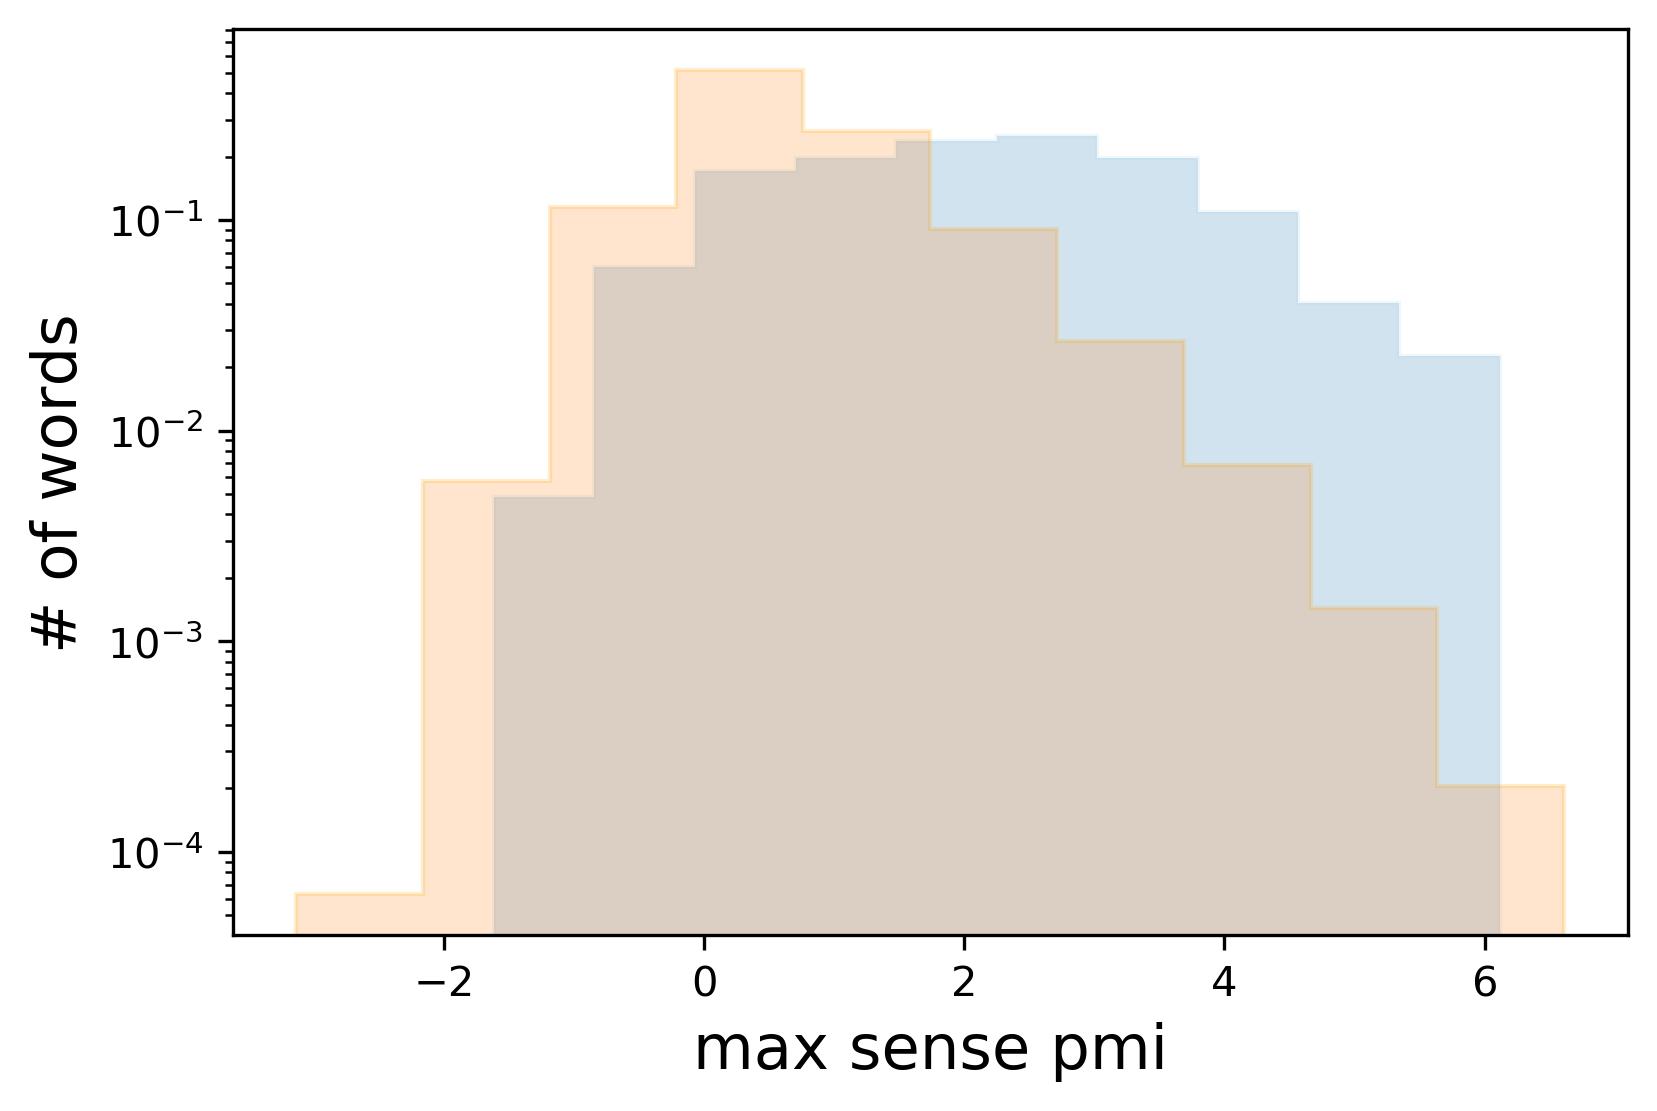

In [459]:
plt.hist(gloss_vals, label="glossary", alpha=0.2, density=True, edgecolor='lightblue', histtype= "stepfilled")
plt.hist(not_gloss_vals, label="non-glossary", alpha=0.2, density=True, edgecolor='orange', histtype= "stepfilled")
plt.yscale('log')
plt.ylabel('# of words', fontsize=15)
plt.xlabel('max sense pmi', fontsize=15)

## Type PMI

In [460]:
gloss_vals = []
not_gloss_vals = []
for filename in tqdm.tqdm(sorted(os.listdir(TYPE_PMI_DIR))): 
    subreddit = filename.replace('_0.2.csv', '')
    if subreddit not in sr2terms: continue
    gloss_terms = set(sr2terms[subreddit])
    with open(TYPE_PMI_DIR + filename, 'r') as infile: 
        w2score = defaultdict(list)
        reader = csv.DictReader(infile)
        for row in reader: 
            w = row['word']
            score = float(row['pmi'])
            if w in gloss_terms: 
                gloss_vals.append(score)
            else: 
                not_gloss_vals.append(score)


100%|██████████| 474/474 [00:01<00:00, 404.97it/s]


In [461]:
print(len(gloss_vals))
print(len(not_gloss_vals))

2138
431596


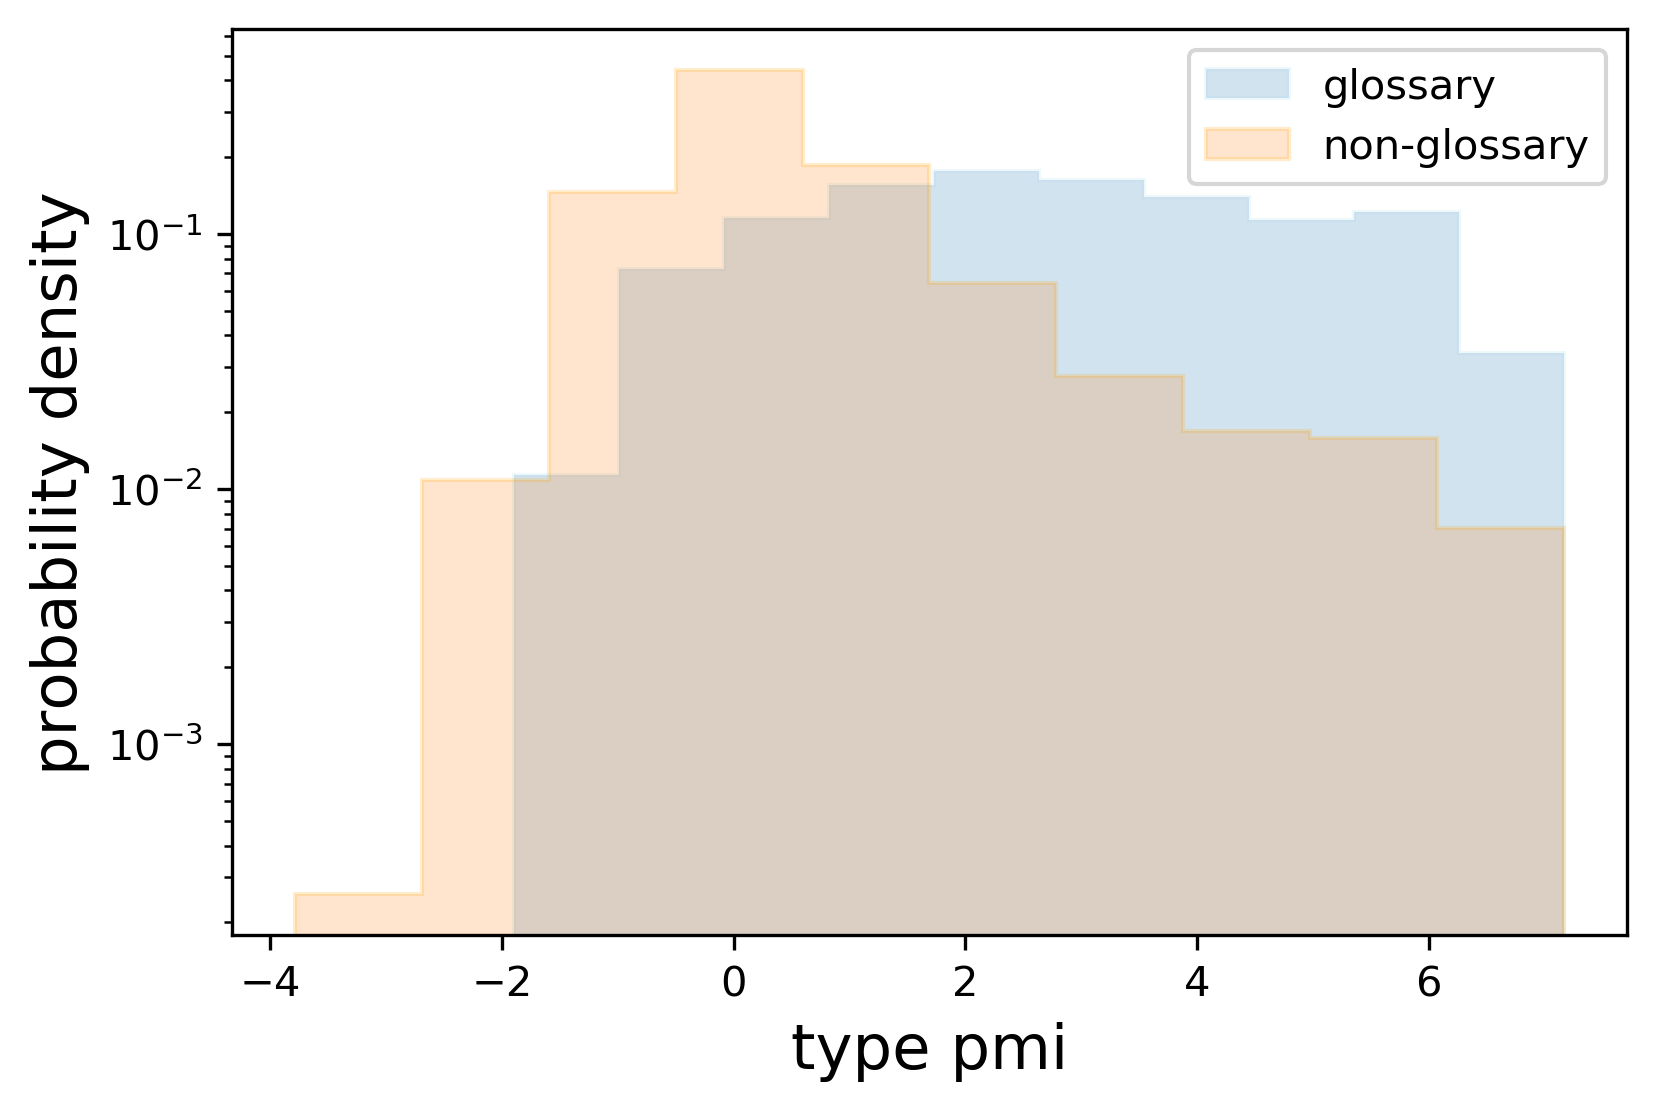

In [462]:
plt.hist(gloss_vals, label="glossary", alpha=0.2, density=True, edgecolor='lightblue', histtype= "stepfilled")
plt.hist(not_gloss_vals, label="non-glossary", alpha=0.2, density=True, edgecolor='orange', histtype= "stepfilled")
plt.yscale('log')
plt.ylabel('probability density', fontsize=15)
plt.xlabel('type pmi', fontsize=15)
plt.legend()

In [463]:
print(ttest_ind(gloss_vals, not_gloss_vals))
print(mannwhitneyu(gloss_vals, not_gloss_vals, alternative='greater'))

Ttest_indResult(statistic=73.7552770269364, pvalue=0.0)
MannwhitneyuResult(statistic=763635062.0, pvalue=0.0)


In [464]:
print(np.median(gloss_vals))
print(np.median(not_gloss_vals))

2.7296269793
0.203674878646


In [465]:
gloss_vals = []
not_gloss_vals = []
for filename in tqdm.tqdm(sorted(os.listdir(TYPE_PMI_DIR))): 
    subreddit = filename.replace('_0.2.csv', '')
    if subreddit not in sr2terms: continue
    gloss_terms = set(sr2terms[subreddit])
    with open(TYPE_PMI_DIR + filename, 'r') as infile: 
        w2score = defaultdict(list)
        reader = csv.DictReader(infile)
        for row in reader: 
            w = row['word']
            score = float(row['pmi'])
            if w in gloss_terms and score < 0.05 and int(row['count']) > 100: 
                print(subreddit, w, score)
            #elif w not in gloss_terms and score > 0.85 and int(row['count']) > 100: 
            #    print(subreddit, w, score)


 14%|█▍        | 68/474 [00:00<00:02, 168.34it/s]

aquariums tbh -0.290549840363
aquariums imo -0.177800076457
askgaybros sub -0.295305157825
asoiaf subreddit -1.09159613935
asoiaf op -0.794964682997
asoiaf lol -0.474476713245
asoiaf so -0.00574812340846
boxoffice for -0.397719816071
boxoffice am -0.373105047313



 26%|██▌       | 121/474 [00:00<00:01, 193.11it/s]

cats quick -0.328046152431
childfree so 0.0025366510769
churning y -0.00940257605664
clashroyale control -0.129020339454
competitiveoverwatch stick -0.159389961671
competitiveoverwatch control -0.0184732955311
datingoverthirty so -0.285063140786
deadbydaylight is -0.186492093806
dnd sad -1.15901335987
dnd mad -0.137028470762



 36%|███▌      | 170/474 [00:00<00:01, 206.84it/s]

dota2 b -0.254751623243
dota2 p -0.0913048476034
dota2 back -0.0136530260229
elderscrollsonline hot -0.755390645489
elderscrollsonline c -0.627473001484
elderscrollsonline drink -0.424317509081
elderscrollsonline tell -0.347922004794
elderscrollsonline war -0.339515877053
elderscrollsonline op -0.0633096800535
elderscrollsonline so -0.0421887771063
exmormon imo -0.65416722986
exmormon fair -0.0599594692259
exmormon by -0.00166996547391
fifa if 0.0102102721642
fireemblemheroes r -0.704858073984
fireemblemheroes is -0.322320148671
future_fight if -0.304165262242
future_fight he -0.241740534273



 73%|███████▎  | 344/474 [00:01<00:00, 325.08it/s]

hearthstone pain -0.230340873684
hearthstone out -0.144231435411
justnomil f -0.571839221403
justnomil so -0.11030330386
ps4 btw -0.333306050357
purplepilldebate so -0.920023640517
skincareaddiction he -1.64063327279
skincareaddiction pc -0.825369568422
skincareaddiction to -0.0822442413504



100%|██████████| 474/474 [00:01<00:00, 344.69it/s]

thedivision hot -1.05372420796
thedivision class -0.366562997759
thedivision epic -0.178890882407
thedivision pull -0.156520494863
wow hot -0.726937428194
wow c -0.48909079676
wow b -0.447248100315
wow g -0.357806275612
wow s -0.173426909789
wow m -0.067997230308
wow if -0.0064774154709


## TFIDF

In [466]:
gloss_vals = []
not_gloss_vals = []
for filename in tqdm.tqdm(sorted(os.listdir(TFIDF_DIR))): 
    subreddit = filename.replace('_0.2.csv', '')
    if subreddit not in sr2terms: continue
    gloss_terms = set(sr2terms[subreddit])
    with open(TFIDF_DIR + filename, 'r') as infile: 
        w2score = defaultdict(list)
        reader = csv.DictReader(infile)
        for row in reader: 
            w = row['word']
            score = float(row['tfidf'])
            if w in gloss_terms: 
                gloss_vals.append(score)
            else: 
                not_gloss_vals.append(score)


100%|██████████| 474/474 [00:01<00:00, 409.92it/s]


In [467]:
print(np.median(gloss_vals))
print(np.median(not_gloss_vals))

0.552308985925
0.0235416471239


In [468]:
print(mannwhitneyu(gloss_vals, not_gloss_vals, alternative='greater'))

MannwhitneyuResult(statistic=693868868.0, pvalue=0.0)


## Finetuned vs. BERT-base

In [3]:
SENSE_PMI_DIR = LOG_DIR + 'ft_max_sense_pmi/'
BASE_SENSE_PMI_DIR = LOG_DIR + 'base_max_sense_pmi/'

In [4]:
diff = Counter()
for filename in tqdm.tqdm(sorted(os.listdir(BASE_SENSE_PMI_DIR))):
    subreddit = filename.replace('.csv', '')
    with open(SENSE_PMI_DIR + filename, 'r') as infile: 
        w2score_ft = defaultdict(float)
        reader = csv.DictReader(infile)
        for row in reader: 
            w = row['word']
            score = float(row['max_pmi'])
            w2score_ft[w] = score
    with open(BASE_SENSE_PMI_DIR + filename, 'r') as infile: 
        w2score_base = defaultdict(float)
        reader = csv.DictReader(infile)
        for row in reader: 
            w = row['word']
            score = float(row['max_pmi'])
            w2score_base[w] = score
    for w in sorted(w2score_ft.keys()): 
        diff[(subreddit, w)] = w2score_base[w] - w2score_ft[w]
mc = diff.most_common()
print("BERT-base much higher:", mc[:30])
print("Finetuned much higher:", mc[-30:])
print("Average difference:", np.mean(np.abs(list(diff.values()))), np.var(np.abs(list(diff.values()))))

100%|██████████| 474/474 [00:11<00:00, 41.10it/s]


BERT-base much higher: [(('transcribersofreddit', 'nope'), 3.3547981589840767), (('counting', 'damn'), 3.1314554352745434), (('stlouisblues', '_'), 2.732201841469328), (('comedyheaven', 'bees'), 2.662676870549444), (('jailbreak', 'fabric'), 2.567209263751736), (('transcribersofreddit', 'commented'), 2.517171903812736), (('sub4sub', 'sub'), 2.4168379497422414), (('lakers', '_'), 2.362656265289445), (('clashofclans', 'stared'), 2.3535645152643103), (('oddlysatisfying', 'lets'), 2.2622955349860847), (('transcribersofreddit', 'placement'), 2.234877192372493), (('transcribersofreddit', 'singer'), 2.2083576173574637), (('counting', 'sunday'), 2.1847597904711695), (('music', 'engage'), 2.1826675740750154), (('hiphopheads', 'chambers'), 2.1459108652103263), (('bodybuilding', 'confuse'), 2.1360001924904815), (('music', 'stones'), 2.134388245383507), (('counting', 'b4'), 2.0636180015462413), (('cursedimages', 'gang'), 2.038923588014871), (('neoliberal', 'scratch'), 2.036941193444594), (('furry_i

In [14]:
for sr in sr2terms: 
    for w in sr2terms[sr]: 
        difference = diff[(sr, w)]
        if difference > 0.5: 
            print(w, sr, difference)

fry aquariums 0.6589248739469364
l aquariums 0.6395980241566278
bf bodybuilding 1.2164923930345335
bop boxoffice 0.6120095619293391
wagon cars 0.5515803765080589
bb churning 0.7540055832184236
co churning 0.5358512122541256
mo churning 0.7679595596897006
pc churning 0.5235975806842967
sc churning 1.3396263561980333
sub churning 1.117906112324666
tu churning 0.5670815221775518
mom deadbydaylight 0.5430250661938216
raw dnd 0.6487622566305571
na elderscrollsonline 0.6225016126886338
ss fitness 0.5880183687542477
sr future_fight 0.7976966129119893
giant hearthstone 0.5078649390402004
vanilla hearthstone 0.5452166087569146
ninja pathofexile 0.9517467051027095
ons purplepilldebate 0.5197605965974872
la skincareaddiction 0.5394074146847605
nugget teenmomogandteenmom2 0.6196547478365568
rs thebachelor 0.9594878914813556
hs thedivision 1.094569487924215
cos wow 0.6639843473293996


## Top 1/2 and 1/4 cutoffs

In [471]:
ROOT = '/data0/lucy/ingroup_lang/'
LOG_DIR = ROOT + 'logs/' 
SENSE_PMI_DIR = LOG_DIR + 'ft_max_sense_pmi/'
BASE_SENSE_PMI_DIR = LOG_DIR + 'base_max_sense_pmi/'
TYPE_PMI_DIR = LOG_DIR + 'pmi/'
TFIDF_DIR = LOG_DIR + 'tfidf/'

In [472]:
def get_medians(path, metric): 
    print(metric)
    vals = []
    for filename in tqdm.tqdm(sorted(os.listdir(path))): 
        subreddit = filename.replace('.csv', '')
        with open(path + filename, 'r') as infile: 
            reader = csv.DictReader(infile)
            for row in reader: 
                w = row['word']
                score = float(row[metric])
                vals.append(score)
    ps = []
    for p in [50, 60, 70, 80, 90, 98, 99]: 
        ps.append(np.percentile(vals, p))
    print(ps)
    return np.percentile(vals, 50), np.percentile(vals, 98)

In [473]:
sense_m, sense_t = get_medians(SENSE_PMI_DIR, 'max_pmi')
base_m, base_t = get_medians(BASE_SENSE_PMI_DIR, 'max_pmi')
type_m, type_t = get_medians(TYPE_PMI_DIR, 'pmi')
tfidf_m, tfidf_t = get_medians(TFIDF_DIR, 'tfidf')


  2%|▏         | 8/474 [00:00<00:06, 72.05it/s]

max_pmi



100%|██████████| 474/474 [00:04<00:00, 102.49it/s][A

  0%|          | 0/474 [00:00<?, ?it/s]

[0.5007301153953705, 0.7039233649614907, 0.953026733779678, 1.2910247870623466, 1.8434940980468622, 3.038046754473495, 3.520420472064922]
max_pmi



100%|██████████| 474/474 [00:04<00:00, 103.24it/s]

  0%|          | 0/474 [00:00<?, ?it/s]

[0.45967200991576324, 0.6578305888775408, 0.903088247779818, 1.2386230395240585, 1.7856920922113735, 2.9681455887196235, 3.442616704682295]
pmi



100%|██████████| 474/474 [00:08<00:00, 52.79it/s]


[0.143621134298, 0.3674494252902001, 0.6634994838245996, 1.1110732048100005, 2.0168260770319986, 5.008815935891599, 5.884734049733797]



  1%|          | 5/474 [00:00<00:11, 41.97it/s]

tfidf



100%|██████████| 474/474 [00:08<00:00, 53.73it/s]


[0.0236022003072, 0.0386624937516, 0.0748252335136, 0.177746800719, 0.537310314502, 3.08256579965, 4.408540023353589]


In [474]:
def get_glossary_percentage(cutoff, path, metric): 
    total_count = 0
    recall_count = 0
    recall_set = set()
    for filename in tqdm.tqdm(sorted(os.listdir(path))): 
        subreddit = filename.replace('.csv', '').replace('_0.2', '')
        if subreddit not in sr2terms: continue
        gloss_terms = set(sr2terms[subreddit])
        with open(path + filename, 'r') as infile: 
            reader = csv.DictReader(infile)
            for row in reader: 
                w = row['word'] 
                score = float(row[metric])
                if w in gloss_terms: 
                    if score >= cutoff: 
                        recall_count += 1
                        recall_set.add((subreddit, w))
                    total_count += 1
    return recall_count / total_count, recall_set

In [475]:
percent, sense_set = get_glossary_percentage(sense_t, SENSE_PMI_DIR, 'max_pmi')
print(percent)
percent, _, = get_glossary_percentage(base_t, BASE_SENSE_PMI_DIR, 'max_pmi')
print(percent)
percent, type_set = get_glossary_percentage(type_t, TYPE_PMI_DIR, 'pmi')
print(percent)
percent, _ = get_glossary_percentage(tfidf_t, TFIDF_DIR, 'tfidf')
print(percent)


100%|██████████| 474/474 [00:00<00:00, 864.70it/s]

 14%|█▍        | 68/474 [00:00<00:00, 657.59it/s]

0.28858218318695106



100%|██████████| 474/474 [00:00<00:00, 883.01it/s]

  6%|▌         | 28/474 [00:00<00:01, 244.30it/s]

0.2973651191969887



100%|██████████| 474/474 [00:01<00:00, 442.92it/s]

  6%|▌         | 28/474 [00:00<00:01, 250.63it/s]

0.17773620205799812



100%|██████████| 474/474 [00:01<00:00, 441.12it/s]

0.16557530402245088


In [476]:
sense_set & type_set

{('antimlm', 'hun')}

In [477]:
# total possible recall of glossary words
total_count = 0
recall_count = 0
for filename in tqdm.tqdm(sorted(os.listdir(TYPE_PMI_DIR))): 
    subreddit = filename.replace('.csv', '').replace('_0.2', '')
    if subreddit not in sr2terms: continue
    gloss_terms = set(sr2terms[subreddit])
    with open(TYPE_PMI_DIR + filename, 'r') as infile: 
        reader = csv.DictReader(infile)
        for row in reader: 
            w = row['word'] 
            score = float(row['pmi'])
            if w in gloss_terms: 
                recall_count += 1
    total_count += len(gloss_terms)
print(recall_count / total_count)


100%|██████████| 474/474 [00:01<00:00, 411.63it/s]

0.702365308804205


### Mean reciprocal rank

In [478]:
# highest is first
def rank_highest_first(path): 
    inv_ranks = []
    ranks = []
    for filename in tqdm.tqdm(sorted(os.listdir(path))): 
        subreddit = filename.replace('.csv', '')
        if subreddit not in sr2terms: continue
        gloss_terms = set(sr2terms[subreddit])
        with open(path + filename, 'r') as infile: 
            w2score = defaultdict(list)
            reader = csv.DictReader(infile)
            i = 0
            found = False
            for row in reader: 
                i += 1
                w = row['word']
                score = float(row['max_pmi'])
                if w in gloss_terms: 
                    rr = 1/float(i)
                    ranks.append(i)
                    found = True
                    inv_ranks.append(rr)
                    break
            if not found: 
                inv_ranks.append(0)
    print(len(inv_ranks))
    print(np.mean(inv_ranks))
    print(np.median(ranks))

In [479]:
rank_highest_first(SENSE_PMI_DIR)
rank_highest_first(BASE_SENSE_PMI_DIR)


100%|██████████| 474/474 [00:00<00:00, 12983.00it/s]

100%|██████████| 474/474 [00:00<00:00, 16079.49it/s]

57
0.3198379431889933
6.0
57
0.3002654668745868
6.0


In [480]:
# lowest is first
def rank_lowest_first(path, metric): 
    inv_ranks = []
    ranks = []
    for filename in tqdm.tqdm(sorted(os.listdir(path))):
        subreddit = filename.replace('_0.2.csv', '')
        if subreddit not in sr2terms: continue
        gloss_terms = set(sr2terms[subreddit])
        with open(path + filename, 'r') as infile: 
            w2score = defaultdict(list)
            reader = csv.DictReader(infile)
            i = 0
            top = 0
            last_w = ''
            for row in reader: 
                i += 1
                w = row['word']
                score = float(row[metric])
                if w in gloss_terms: 
                    last_w = w
                    top = i
            if top == 0: 
                inv_ranks.append(0)
            rank = i - top + 1
            inv_ranks.append(1/float(rank))
            ranks.append(rank)
    print(len(inv_ranks))
    print(np.mean(inv_ranks))
    print(np.median(ranks))

In [481]:
rank_lowest_first(TYPE_PMI_DIR, 'pmi')
rank_lowest_first(TFIDF_DIR, 'tfidf')


100%|██████████| 474/474 [00:01<00:00, 348.88it/s]

  6%|▌         | 28/474 [00:00<00:01, 244.62it/s]

57
0.11604329422865926
29.0



100%|██████████| 474/474 [00:01<00:00, 434.82it/s]

57
0.18687074579740115
19.0
